In [ ]:
sql_statement_bivariate = """
WITH table1 as (
	SELECT loc.Country, COUNT(post.fraudulent) as total_fraud_postings
	FROM Posting post INNER JOIN Location loc ON post.LocationID = loc.LocationID
						INNER JOIN Industry ind ON post.IndustryId = ind.IndustryId
	WHERE post.fraudulent = 1 AND ind.IndustryName != '' AND loc.Country != ''
	GROUP BY loc.Country
)
SELECT loc.Country, ind.IndustryName, Count(post.fraudulent) as fraud_postings, table1.total_fraud_postings
FROM Posting post INNER JOIN Location loc ON post.LocationID = loc.LocationID
					INNER JOIN Industry ind ON post.IndustryId = ind.IndustryId
					INNER JOIN table1 ON table1.Country = loc.Country
WHERE post.fraudulent = 1 AND ind.IndustryName != ''
GROUP BY loc.Country, ind.IndustryName
ORDER BY loc.Country, -fraud_postings
"""

In [ ]:
conn = create_connection("normalized_data.db")
with conn:
    df = pd.read_sql_query(sql_statement_bivariate, conn)

In [ ]:
df['percentages'] = df['fraud_postings']/df['total_fraud_postings']

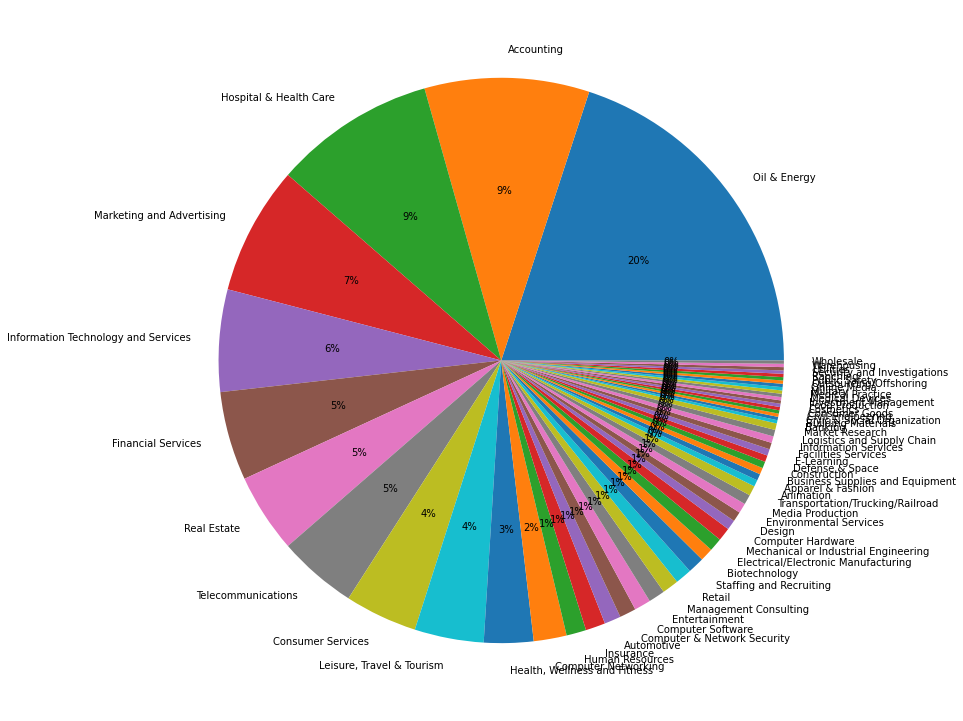

In [ ]:
plt.figure(figsize=(15,13))
plt.pie(df['percentages'], labels = df['IndustryName'], autopct='%1.0f%%');
plt.show()